# Baby Names

*  Giulia MANNAIOLI
*  Lais Isabelle ALVES DOS SANTOS
*  Pedro ANDRADE FERREIRA SOBRINHO
*  Rafael SENNA BENATTI


### Import libraries

In [1]:
import altair as alt
import pandas as pd

alt.data_transformers.enable('json') # work-around to let Altair handle larger data sets

DataTransformerRegistry.enable('json')

### Data Loading

In [2]:
# Detect if using colab
if 'google.colab' in str(get_ipython()):
    colab = True
else:
    colab = False

if colab:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

    path = '/content/drive/MyDrive/IGRMiniProject/baby_names_visualization/'
else:
    path = './'

In [57]:
# Reference to data
baby_names = pd.read_csv(path + 'dpt2020.csv', delimiter=';')

# Pre-process data set
baby_names = baby_names[baby_names.annais != 'XXXX']
baby_names = baby_names[baby_names.dpt != 'XX']
baby_names = baby_names[baby_names.preusuel != '_PRENOMS_RARES']    # remove rare nomes for simplification

# show data
baby_names.reset_index()

index  sexe preusuel annais  dpt  nombre
0          10885     1    AADIL   1983   84       3
1          10886     1    AADIL   1992   92       3
2          10888     1    AAHIL   2016   95       3
3          10892     1    AARON   1962   75       3
4          10893     1    AARON   1976   75       3
...          ...   ...      ...    ...  ...     ...
3668269  3727545     2      ZYA   2013   44       4
3668270  3727546     2      ZYA   2013   59       3
3668271  3727547     2      ZYA   2017  974       3
3668272  3727548     2      ZYA   2018   59       3
3668273  3727550     2     ZYNA   2013   93       3

[3668274 rows x 6 columns]

### Visualization 1

How do baby names evolve over time? Are there names that have consistently remained popular or unpopular? Are there some that have were suddenly or briefly popular or unpopular? Are there trends in time?

In [6]:
# New data frame for visualization 1
baby_names_vis1 = baby_names
baby_names_vis1

sexe preusuel annais  dpt  nombre
10885       1    AADIL   1983   84       3
10886       1    AADIL   1992   92       3
10888       1    AAHIL   2016   95       3
10892       1    AARON   1962   75       3
10893       1    AARON   1976   75       3
...       ...      ...    ...  ...     ...
3727545     2      ZYA   2013   44       4
3727546     2      ZYA   2013   59       3
3727547     2      ZYA   2017  974       3
3727548     2      ZYA   2018   59       3
3727550     2     ZYNA   2013   93       3

[3668274 rows x 5 columns]

In [7]:
# Sum the number of babies within the name and the year
n_names = baby_names_vis1.groupby(['annais', 'preusuel'])['nombre'].sum().reset_index()

# Create new dataframe with this data
new_baby_names_vis1 = pd.DataFrame({
    'names': n_names['preusuel'],
    'year': n_names['annais'],
    'number': n_names['nombre']
})

In [8]:
# Create visualization 1 with all the name
vis1 = alt.Chart(new_baby_names_vis1).mark_line().encode(
    x='year:T',         # encode the year as 'x' and time
    y='number:Q',       # encode the number of babies as 'y' and quantity
    color='names:N'     # encode the name as the color of the line
).properties(           
    # Change the size of the chart
    width=1000,
    height=500
)

vis1

alt.Chart(...)

Display random 10 names

In [15]:
# Choose three random names from the DataFrame
random_names = new_baby_names_vis1['names'].sample(n=10)
filtered_vis1 = new_baby_names_vis1[new_baby_names_vis1['names'].isin(random_names)]

In [16]:
# Call visualization
vis1 = alt.Chart(filtered_vis1).mark_line().encode(
    x='year:T',         # encode the year as 'x' and time
    y='number:Q',       # encode the number of babies as 'y' and quantity
    color='names:N'     # encode the name as the color of the line
).properties(           
    # Change the size of the chart
    width=1000,
    height=500
)

vis1

alt.Chart(...)

### Visualization 2

Is there a regional effect in the data? Are some names more popular in some regions? Are popular names generally popular across the whole country?

In [46]:
# Dataframe to work with visualization 2
baby_names_vis2 = baby_names

In [48]:
import pandas as pd
import plotly.express as px

# Select a random name to show the presence in different departments
random_name = baby_names_vis2['preusuel'].sample(n=1)
selected_rows = baby_names_vis2[baby_names_vis2['preusuel'].isin(random_name)]

# Group by department
department_counts = selected_rows.groupby('dpt')['nombre'].sum().reset_index()

fig = px.treemap(department_counts, path=['dpt'], values='nombre')
fig.update_layout(title=f'Occurrences of {random_name.values} by Department')

fig.show()

### Grouped bar chart

In [51]:
import pandas as pd
import altair as alt

custom_colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#FFA500', '#800080', '#008000', '#000080',
                 '#FFC0CB', '#00CED1', '#FF8C00', '#8B0000', '#8B008B', '#FF1493', '#00FF7F', '#1E90FF', '#FFD700', '#FF4500',
                 '#9932CC', '#7CFC00', '#ADFF2F', '#00BFFF', '#FF69B4', '#40E0D0', '#BA55D3', '#FFDAB9', '#00FA9A', '#87CEEB',
                 '#EE82EE', '#FF6347', '#F08080', '#20B2AA', '#FFB6C1', '#3CB371', '#6A5ACD', '#FFA07A', '#8FBC8F', '#00BFFFF',
                 '#D8BFD8', '#FF00FF', '#7FFF00', '#4B0082', '#FF7F50', '#9ACD32', '#FF4500', '#AFEEEE', '#DDA0DD', '#FFDAB9',
                 '#DB7093', '#B0C4DE', '#F4A460', '#BA55D3', '#FFDEAD', '#9ACD32', '#CD5C5C', '#E6E6FA', '#CD853F', '#FFC0CB',
                 '#D2691E', '#FF69B4', '#66CDAA', '#7B68EE', '#F5DEB3', '#8A2BE2', '#BDB76B', '#DC143C', '#00FA9A', '#FF1493']

name_department_counts = baby_names_vis2.groupby(['preusuel', 'dpt'])['nombre'].sum().reset_index()

grouped_bar_chart = alt.Chart(name_department_counts).mark_bar().encode(
    alt.X('dpt:N', axis=alt.Axis(title='Department')),
    alt.Y('nombre:Q', axis=alt.Axis(title='Occurrences')),
    alt.Color('preusuel:N', scale=alt.Scale(range=custom_colors), legend=alt.Legend(title='Name')),
    tooltip=['preusuel:N', 'dpt:N', 'nombre:Q']
).properties(
    title='Occurrences of Names by Department',
    height=700 ,
    width= 1700
)
grouped_bar_chart


alt.Chart(...)

In [56]:
import random

name_department_counts = baby_names_vis2.groupby(['preusuel', 'dpt'])['nombre'].sum().reset_index()

# Choose 15 random names from the DataFrame
random_names = random.sample(list(name_department_counts['preusuel'].unique()), 10)
filtered_name_department_counts = name_department_counts[name_department_counts['preusuel'].isin(random_names)]

grouped_bar_chart = alt.Chart(filtered_name_department_counts).mark_bar().encode(
    alt.X('dpt:N', axis=alt.Axis(title='Department')),
    alt.Y('nombre:Q', axis=alt.Axis(title='Occurrences')),
    alt.Color('preusuel:N', scale=alt.Scale(range=custom_colors), legend=alt.Legend(title='Name')),
    tooltip=['preusuel:N', 'dpt:N', 'nombre:Q']
).properties(
    title='Occurrences of Randomly Selected Names by Department'
)
grouped_bar_chart


alt.Chart(...)

### Visualization 3

Are there gender effects in the data? Does popularity of names given to both sexes evolve consistently?

In [58]:
baby_names_vis3 = baby_names

In [59]:
name_year_counts = baby_names_vis3.groupby(['preusuel', 'annais'])['nombre'].sum().reset_index()

# Exclude names with preusuel = "_PRENOMS_RARES"
name_year_counts = name_year_counts[name_year_counts['preusuel'] != "_PRENOMS_RARES"]

# Sort by 'annais'
name_year_counts_filtered = name_year_counts.sort_values('annais')

# Filter for neutral names
name_counts = baby_names.groupby('preusuel')['sexe'].nunique()  #group by name and leave just one name for the same sex
filtered_names = name_counts[name_counts == 2].index.tolist()   #select only the names that have both sexes (more than one line)

# Filtra name_year_counts per i nomi selezionati
name_year_counts_filtered = name_year_counts[name_year_counts['preusuel'].isin(filtered_names)]

# Calculate the minimum and maximum popularity to set the colorscale
min_popularity = name_year_counts_filtered['nombre'].min()
max_popularity = name_year_counts_filtered['nombre'].max()

print("Minimum Popularity:", min_popularity)
print("Maximum Popularity:", max_popularity)

Minimum Popularity: 3
Maximum Popularity: 53596


In [60]:
# Check if the filter works
print(filtered_names)   #'ADAMA', 'ADAME', 'ADDA', 'ADELAIDE', 'ADOLPHE', 'ADONAI', 'ADRIEN', ...

filtered_data = baby_names[baby_names['preusuel'] == 'ADRIEN']
filtered_data

['ABDON', 'ABEL', 'ACHILLE', 'ADAM', 'ADAMA', 'ADAME', 'ADDA', 'ADELAIDE', 'ADOLPHE', 'ADONAI', 'ADRIEN', 'ADÈLE', 'AEL', 'AELIG', 'AGATHE', 'AGNAN', 'AGNÈS', 'AH', 'AISSA', 'ALAIN', 'ALBAN', 'ALBERT', 'ALEX', 'ALEXANDRE', 'ALEXIS', 'ALEXY', 'ALFRED', 'ALICE', 'ALIX', 'ALOISE', 'ALOYSE', 'ALPHONSE', 'AMAL', 'AMANE', 'AMANI', 'AMARA', 'AMBROISE', 'AMEDEE', 'AMEL', 'AMINE', 'AMOUR', 'AMÉLIE', 'ANAEL', 'ANASTASE', 'ANASTASIE', 'ANATOLE', 'ANAËL', 'ANDOCHE', 'ANDREA', 'ANDRÉ', 'ANDRÉA', 'ANDRÉE', 'ANDY', 'ANGE', 'ANGE-MARIE', 'ANGEL', 'ANGELY', 'ANGES', 'ANGY', 'ANGÈLE', 'ANH', 'ANICET', 'ANIK', 'ANNE', 'ANNICK', 'ANNONCIAT', 'ANONYME', 'ANSELME', 'ANTOINE', 'ANTONIE', 'APOLLINAIRE', 'APOLLONIE', 'APPOLINAIRE', 'ARCADE', 'ARIEL', 'ARISTIDE', 'ARMEL', 'ARSENE', 'ARTHUR', 'ASHLEY', 'ASIL', 'ASSIL', 'ATHANASE', 'ATTALE', 'AUBERT', 'AUBIERGE', 'AUBIN', 'AUDE', 'AUDREN', 'AUDREY', 'AUGUSTE', 'AUGUSTIN', 'AURELE', 'AURÉLIE', 'AURÉLIEN', 'AUXANE', 'AVIT', 'AWEN', 'AXEL', 'AYANE', 'AYDEN', 'AËLIG'

sexe preusuel annais  dpt  nombre
32312       1   ADRIEN   1900   01       8
32313       1   ADRIEN   1900   02      15
32314       1   ADRIEN   1900   03       5
32315       1   ADRIEN   1900   04       3
32316       1   ADRIEN   1900   05       5
...       ...      ...    ...  ...     ...
39621       1   ADRIEN   2020   95       9
39622       1   ADRIEN   2020  971       3
39623       1   ADRIEN   2020  973       6
39624       1   ADRIEN   2020  974      10
1753227     2   ADRIEN   1952  972       3

[7314 rows x 5 columns]

### Implementation with plotly

In [61]:
import plotly.graph_objects as go
import numpy as np

colorscales = [
    [0.0, "rgb(68, 1, 84)"],
    [0.03, "rgb(72, 35, 116)"],
    [0.07, "rgb(64, 86, 135)"],
    [0.1, "rgb(52, 132, 144)"],
    [0.13, "rgb(94, 181, 122)"],
    [0.17, "rgb(140, 208, 95)"],
    [0.2, "rgb(179, 226, 70)"],
    [0.23, "rgb(217, 240, 52)"],
    [0.27, "rgb(253, 231, 37)"],
    [0.3, "rgb(238, 160, 30)"],
    [1.0, "rgb(215, 25, 28)"]
]


# Define the logarithmic range of values
zmin = 3
zmax = 50000
z_range = np.logspace(np.log10(zmin), np.log10(zmax), len(colorscales)-1)


# Create the heatmap chart using plotly
fig = go.Figure(data=go.Heatmap(
    x=name_year_counts['annais'],
    y=name_year_counts['preusuel'],
    z=name_year_counts['nombre'],
    colorscale=colorscales,
    zmin=zmin,
    zmax=zmax,
))

# Customize the layout of the heatmap
fig.update_layout(
    title='Popularity of Baby Neutral-Names Over Time',
    xaxis_title='Year',
    yaxis_title='Names',
)

# Update the hover label formatting
fig.update_traces(hovertemplate='Year: %{x}<br>'+
                                  'Names: %{y}<br>'+
                                  'Popularity: %{z}')

# Add colorbar
fig.update_layout(coloraxis_colorbar=dict(
    title='Popularity',
    titleside='right',
    tickmode='array',
    tickvals=z_range,
    ticktext=[f'{int(val)}' if val >= 1000 else f'{int(val):.0f}' for val in z_range]
))

# Display the heatmap
fig.show()

A picture of another visualization obtained:

 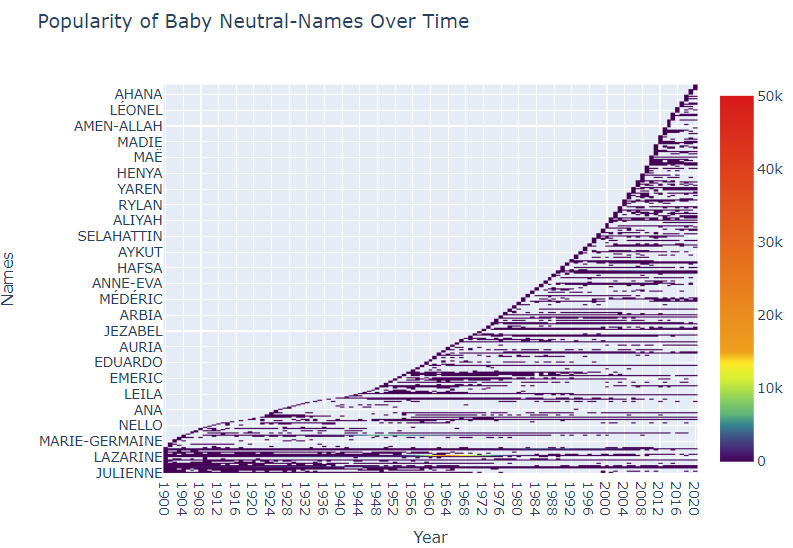

This kind of heatmap is good because you can zoom in and out and you can see the linear growth of the trend very well because it is sorted by popularity. 
This visualization look better than the implementation with altair at first sight because it seems more organized: it reduces automatically the number of names and years showed in the axis.
It is recommended to try it on colab to see how to navigate the map.
This is an exemple of the zoomed heatmap. It is really good because we can zoom in, zoom out and also scroll and navigate the datas.

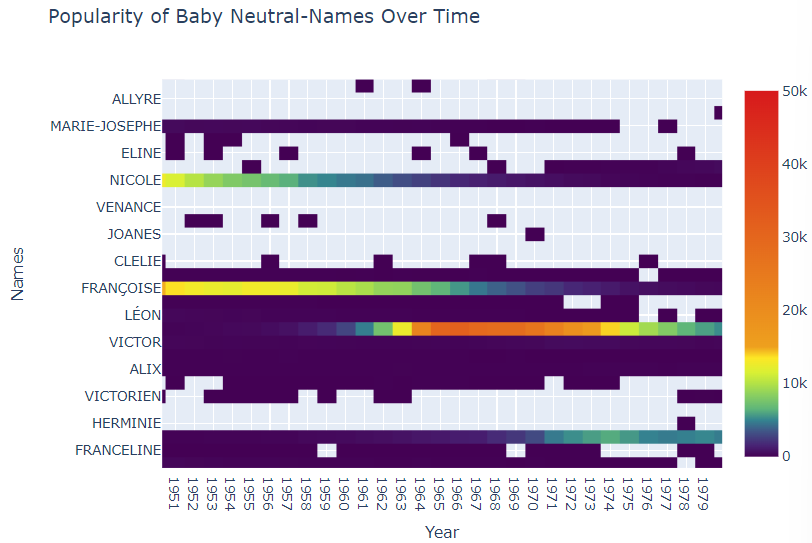

Anyway there are a problem that is solved in the second implementation:
With the hover, when there is no name in a given year, the heatmap does not display any color or z data. However, it is important to note that in these cases, the popularity of the name is actually 0. Unfortunately, I was unable to find a solution to display the value 0 in the hover label when there is no corresponding data for a specific name and year.

With this implementation We succed to obtain a better gradient to represent the popularity of the names:
We made modifications to the colorscale used in the heatmap. Previously, the colorscale was dominated by shades of purple, making it difficult to distinguish variations in popularity for names with counts less then 10,000. To enhance the visual representation, I expanded the colorscale to include a wider range of colors for counts up to 15,000, and reduced the number of colors used for counts above that threshold until the red for the 50k.




### Implementation with Altair 

In [63]:
import pandas as pd
import altair as alt
import numpy as np

colorscales = [
    [0.0, int("440154", 16)],
    [0.03, int("482374", 16)],
    [0.07, int("403887", 16)],
    [0.1, int("348094", 16)],
    [0.13, int("5A74A0", 16)],
    [0.17, int("8CB05F", 16)],
    [0.2, int("B3E246", 16)],
    [0.23, int("D9F43C", 16)],
    [0.27, int("FDE725", 16)],
    [0.3, int("EEA01E", 16)],
    [1.0, int("D7191C", 16)]
]

# Define the logarithmic range of values
zmin = 3
zmax = 50000
z_range = np.logspace(np.log10(zmin), np.log10(zmax), len(colorscales)-1)

# Create the brush selection
brush = alt.selection_interval(encodings=['x', 'y'])

# Create the heatmap using Altair
heatmap = alt.Chart(name_year_counts_filtered).mark_rect().encode(
    x='annais:O',
    y='preusuel:O',
    color=alt.Color('nombre:Q', scale=alt.Scale(type='log', domain=[zmin, zmax], scheme='viridis')),
    tooltip=['annais:O', 'preusuel:O', 'nombre:Q']
).properties(
    title='Popularity of Baby Neutral-Names Over Time',
    width=1200,
    height=800
).add_params(brush)

# Create the filtered heatmap based on the brush selection
filtered_heatmap = alt.Chart(name_year_counts_filtered).mark_rect().encode(
    x='annais:O',
    y='preusuel:O',
    color=alt.Color('nombre:Q', scale=alt.Scale(type='linear', domain=[zmin, zmax], range=colorscales)),
    tooltip=['annais:O', 'preusuel:O', 'nombre:Q']
).properties(
    title='Selected Popularity of Baby Neutral-Names Over Time',
    width=1200,
    height=800
).transform_filter(brush)

# Display both heatmaps together
heatmap & filtered_heatmap


alt.VConcatChart(...)

Display 10 random names

In [65]:
random_names = name_year_counts_filtered['preusuel'].sample(n=10)
name_year_counts_10 = name_year_counts_filtered[name_year_counts_filtered['preusuel'].isin(random_names)]

# Create the heatmap using Altair
heatmap = alt.Chart(name_year_counts_10).mark_rect().encode(
    x='annais:O',
    y='preusuel:O',
    color=alt.Color('nombre:Q', scale=alt.Scale(type='log', domain=[zmin, zmax], scheme='viridis')),
    tooltip=['annais:O', 'preusuel:O', 'nombre:Q']
).properties(
    title='Popularity of Baby Neutral-Names Over Time',
    width=1700,
    height=400
)

heatmap

alt.Chart(...)

- In an attempt to address the issue of color gradient, I made modifications to the colorscale used in the heatmap. Previously, the colorscale was dominated by shades of purple, making it difficult to distinguish variations in popularity for names with counts less then 10,000. To enhance the visual representation, I expanded the colorscale to include a wider range of colors for counts up to 10,000, and reduced the number of colors used for counts above that threshold.
This was the result with viridis from 0 to 50k:

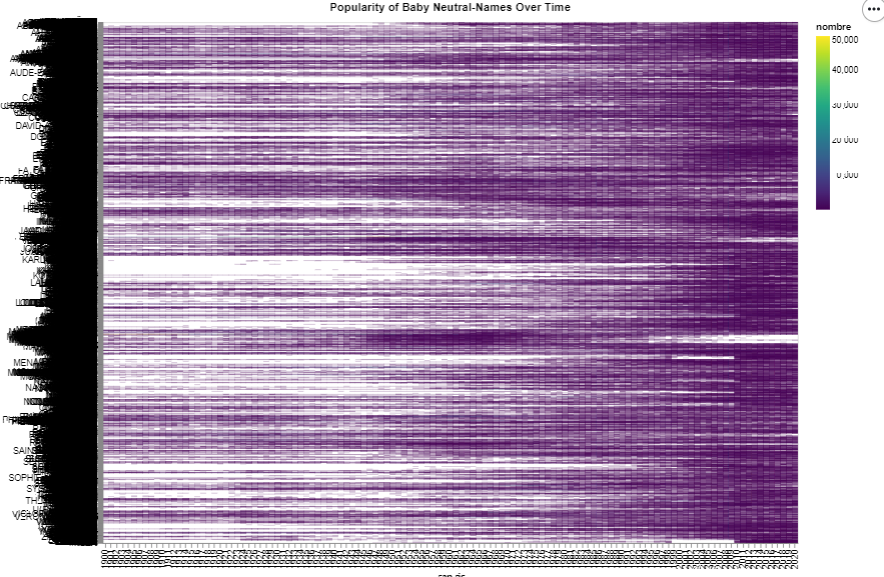


- To navigate the heatmap effectively, it is recommended to use the selector and select a smaller part of the map. This allows for a better view and legibility of all the names displayed. In that way, users can explore the heatmap in detail and observe the changing popularity of names over time.


#### Comments

We choose to implement the heatmap because this visualization effectively showcases the evolution of baby neutral-names over time.
Compared to other visualizations, such as line charts or bar graphs, the heatmap has distinct advantages. It excels in showcasing the complete picture without overlapping lines, ensuring that each name's popularity is clearly visible and discernible. By utilizing varying colors, the heatmap not only presents the popularity of each name but also enables easy identification and understanding of the trends. This makes it an ideal choice for analyzing the evolution of baby neutral-names, as it provides a comprehensive and visually appealing representation of the data.
Anyway, it's important to consider factors such as the size limitations of the visualization with a large number of names and challenges in distinguishing between subtle variations in quantity.

In analyzing the data, it is evident that there are gender effects and trends in the popularity of names given to both sexes. Over time, there has been a significant increase of giving neutral names to children. This trend is particularly pronounced in the last period, where we observe a consistent and linear growth in the popularity of neutral names, especially after the **year 1950** (more or less).

This increase in the use of neutral names can be attributed to several factors. Firstly, the progress in LGBT+ rights and the increasing acceptance and recognition of diverse gender identities have influenced the naming practices. Additionally, the empowerment of women and the blurring of traditional gender roles have also contributed to the rise of neutral names. As societal norms evolve and the distinctions between genders become less rigid, there is a growing tendency to choose names that are not strictly associated with a specific gender.
So, the data supports the notion that the popularity of neutral names has been evolving consistently, with a notable surge in recent years. This trend reflects the broader societal changes towards inclusivity and the recognition of diverse gender expressions.